In [26]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot

In [27]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")

In [28]:
# read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url, header=None, prefix="V")

In [12]:
# print head and tail of data frame
print(rocksVMines.head())
print(rocksVMines.tail())

rows = rocksVMines.shape[0]

# print summary of data frame
summary = rocksVMines.describe()
print(summary)

       V0      V1      V2      V3      V4      V5      V6      V7      V8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       V9 ...      V51     V52     V53     V54     V55     V56     V57  \
0  0.2111 ...   0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872 ...   0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194 ...   0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264 ...   0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459 ...   0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V58     V59  V60  
0  0.0090  0.0032    R  
1  0.0052  0.0044    R  
2  0.0095  0.0078

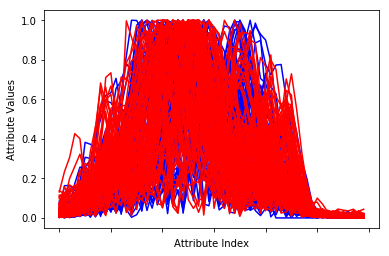

In [29]:
# parallel coordinates graph of real attribute visualization
for i in range(rows):
    # assign color based on "M" or "R" labels
    if rocksVMines.iat[i,60] == "M":
        pcolor = "red"
    else:
        pcolor = "blue"

    # plot rows of data as if they were series data
    dataRow = rocksVMines.iloc[i,0:60]
    dataRow.plot(color=pcolor)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

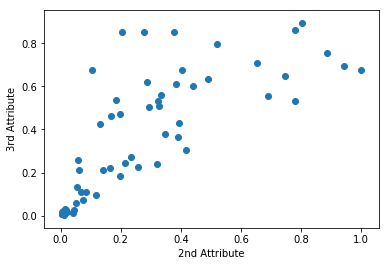

In [30]:
# visualizing interrelationships between attributes and labels

# calculate correlations between real-valued attributes
dataRow2 = rocksVMines.iloc[1,0:60]
dataRow3 = rocksVMines.iloc[2,0:60]

plot.scatter(dataRow2, dataRow3)

plot.xlabel("2nd Attribute")
plot.ylabel(("3rd Attribute"))
plot.show()

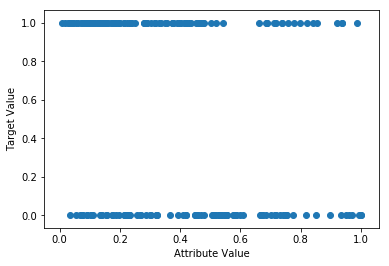

In [32]:
# correlation between classification target and real attributes

target = []

for i in range(rows):
    # assign o or 1 target value based on "M" or "R" labels
    if rocksVMines.iat[i,60] == "M":
        target.append(1.0)
    else:
        target.append(0.0)
        
# plot 35th attribute
dataRow = rocksVMines.iloc[0:208, 35]
plot.scatter(dataRow, target)

plot.xlabel("Attribute Value")
plot.ylabel(("Target Value"))
plot.show()

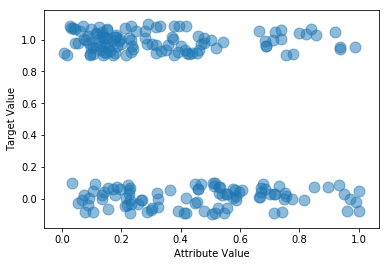

In [31]:
# to improve the visualization, dither the points a little and make them transparent

from random import uniform

target = []

for i in range(rows):
    # assin 0 or 1 target value based on "M" or "R" labels and add some dither
    
    if rocksVMines.iat[i,60] == "M":
        target.append(1.0 + uniform(-0.1, 0.1))
    else:
        target.append(0.0 + uniform(-0.1, 0.1))
        
# plot 35th attribute with semi-opaque points
dataRow = rocksVMines.iloc[0:208, 35]
plot.scatter(dataRow, target, alpha=0.5, s=120)

plot.xlabel("Attribute Value")
plot.ylabel(("Target Value"))
plot.show()

In [33]:
# pearson's correlation calculation for attribute 2 vs 3 and 2 vs 21

from math import sqrt

# calculate correlations between real-valued attributes
dataRow2 = rocksVMines.iloc[1,0:60]
dataRow3 = rocksVMines.iloc[2,0:60]
dataRow21 = rocksVMines.iloc[20,0:60]

mean2 = 0.0; mean3 = 0.0; mean21 = 0.0
numElt = len(dataRow2)

for i in range(numElt):
    mean2 += dataRow2[i]/numElt
    mean3 += dataRow3[i]/numElt
    mean21 += dataRow21[i]/numElt
    
var2 = 0.0; var3 = 0.0; var21 = 0.0
for i in range(numElt):
    var2 += (dataRow2[i] - mean2)*(dataRow2[i] - mean2)/numElt
    var3 += (dataRow3[i] - mean3)*(dataRow3[i] - mean3)/numElt
    var21 += (dataRow21[i] - mean21)*(dataRow21[i] - mean21)/numElt

corr23 = 0.0; corr221 = 0.0
for i in range(numElt):
    corr23 += (dataRow2[i] - mean2)*(dataRow3[i] - mean3)/(sqrt(var2*var3) * numElt)
    corr221 += (dataRow2[i] - mean2)*(dataRow21[i] - mean21)/(sqrt(var2*var21) * numElt)
    
print("Correction btween attribute 2 and 3")
print(corr23)

print("Correction btween attribute 2 and 21")
print(corr221)

Correction btween attribute 2 and 3
0.7709381211911223
Correction btween attribute 2 and 21
0.46654808078868865


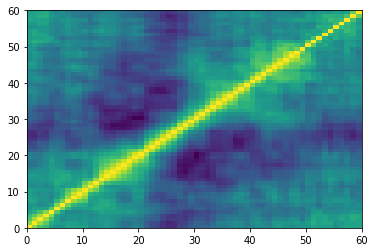

In [34]:
# visualizating attribute and label correlations using a heat map

# calculate correlations between real-value attribtues
corMat = DataFrame(rocksVMines.corr())

# visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()